In [32]:
import pandas as pd
from pandas_datareader import data as pdr
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [33]:
start_date = '2000-01-01'
end_date = '2023-01-01'

cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)
ppi = pdr.get_data_fred('PPIACO', start=start_date, end=end_date)

cpi.index = pd.DatetimeIndex(cpi.index).to_period('M').to_timestamp()
ppi.index = pd.DatetimeIndex(ppi.index).to_period('M').to_timestamp()

df = pd.merge(cpi, ppi, left_index=True, right_index=True)
df.columns = ['CPI', 'PPI']


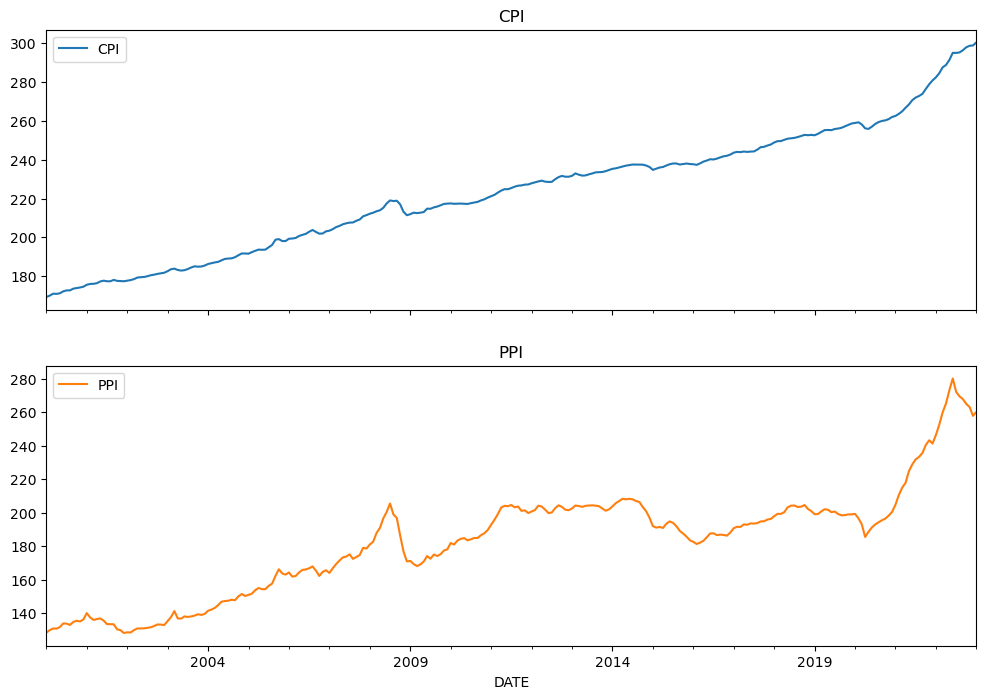

In [34]:
df.plot(subplots=True, figsize=(12, 8), title=['CPI', 'PPI'])
plt.show()


In [35]:
model_cpi = ARIMA(df['CPI'], order=(5, 1, 0))
model_cpi_fit = model_cpi.fit()

model_ppi = ARIMA(df['PPI'], order=(5, 1, 0))
model_ppi_fit = model_ppi.fit()


In [36]:
forecast_cpi = model_cpi_fit.forecast(steps=12)
df_forecast_cpi = pd.DataFrame(forecast_cpi, index=pd.date_range(start='2023-02-01', periods=12, freq='M'), columns=['CPI_Forecast'])

forecast_ppi = model_ppi_fit.forecast(steps=12)
df_forecast_ppi = pd.DataFrame(forecast_ppi, index=pd.date_range(start='2023-02-01', periods=12, freq='M'), columns=['PPI_Forecast'])


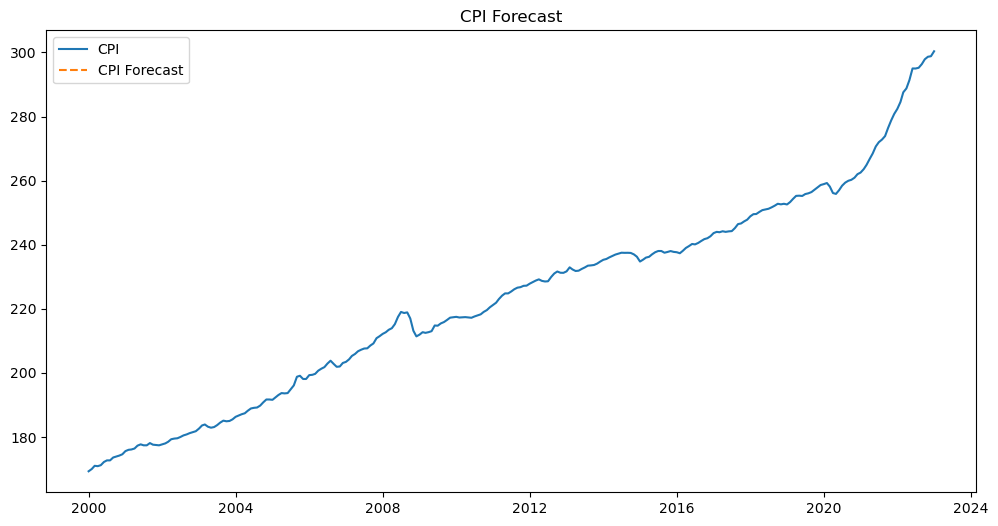

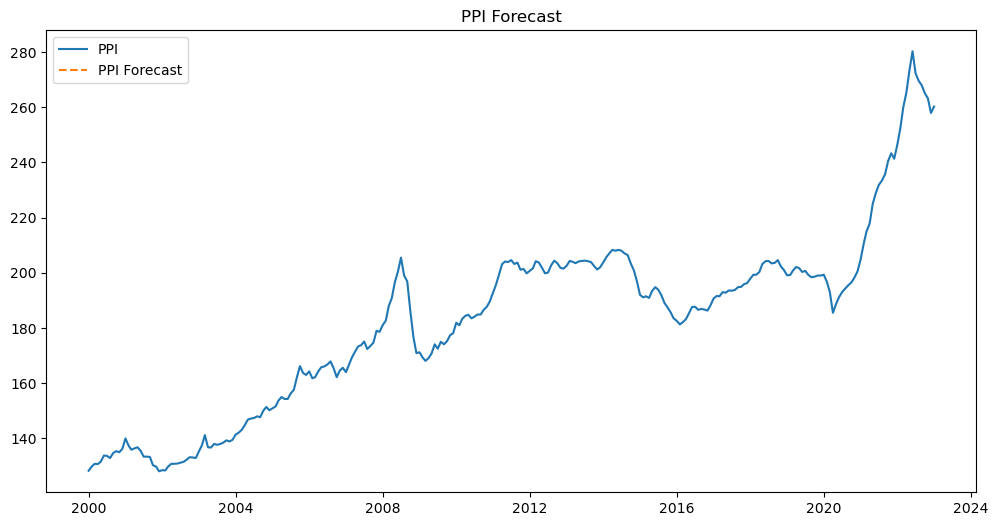

In [37]:
df_combined_cpi = pd.concat([df['CPI'], df_forecast_cpi['CPI_Forecast']])
df_combined_ppi = pd.concat([df['PPI'], df_forecast_ppi['PPI_Forecast']])

plt.figure(figsize=(12, 6))
plt.plot(df_combined_cpi, label='CPI')
plt.plot(df_forecast_cpi, label='CPI Forecast', linestyle='--')
plt.title('CPI Forecast')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_combined_ppi, label='PPI')
plt.plot(df_forecast_ppi, label='PPI Forecast', linestyle='--')
plt.title('PPI Forecast')
plt.legend()
plt.show()


In [39]:
df_forecast_cpi

,CPI_Forecast
2023-02-28,NaN
2023-03-31,NaN
2023-04-30,NaN
2023-05-31,NaN
2023-06-30,NaN
2023-07-31,NaN
2023-08-31,NaN
2023-09-30,NaN
2023-10-31,NaN
2023-11-30,NaN
